<a href="https://colab.research.google.com/github/taliahtarik/PCA/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams. Some of these scam e-mails have some offensive content. I don't think anything is worse than R-rated, but I just want to warn you that if you start reading the e-mail text, you might read something offensive. If that's a problem, feel free to e-mail me and we can talk about it more or you can skip the assignment.  

### Q1.

Open the `Phishing_Email.parquet` data. It is available at `https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet`, and you can download it directly using Pandas by providing that URL: `df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')`.

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The `Email Text` variable contains the actual text of the email and the `Email Type` takes the value `Phishing Email` or `Safe Email`. We want to predict which emails are phishing emails from their contents.

Use the `str.split()` method to break the `Phishing Email` values into **tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

In [ ]:
import numpy as np
import pandas as pd
import pickle
from collections import Counter
from multiprocessing.pool import Pool
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')
tokens = df['Email Text'].str.split()
tokens.head()


,Email Text
0,"[re, :, 6, ., 1100, ,, disc, :, uniformitarian..."
1,"[the, other, side, of, *, galicismos, *, *, ga..."
2,"[re, :, equistar, deal, tickets, are, you, sti..."
3,"[Hello, I, am, your, hot, lil, horny, toy., I,..."
4,"[software, at, incredibly, low, prices, (, 86,..."


TypeError: unhashable type: 'list'

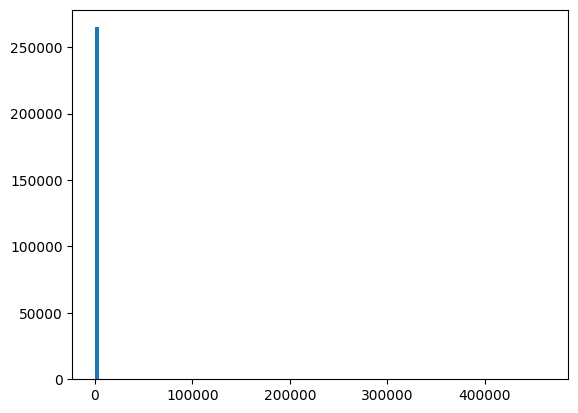

In [ ]:
import pickle
from collections import Counter
import itertools # Import itertools for flattening
import pandas as pd

with open('all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

# Flatten the list of lists using itertools.chain.from_iterable
all_tokens_flat = list(itertools.chain.from_iterable(all_tokens)) # New line to flatten the list

token_count = Counter(all_tokens_flat)  # Now pass the flattened list to Counter
token_freq = token_count.most_common()

gdf = pd.DataFrame(token_freq,columns=['token','count'])
gdf['count'].hist(grid=False,bins=100)
with open('all_tokens.pickle', 'wb') as file:
    pickle.dump(tokens, file)

with open('all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

gdf = pd.DataFrame(token_freq,columns=['token','count'])
gdf['count'].hist(grid=False,bins=100)

In [ ]:
gdf['count'].describe()

,count
count,265111.000000
mean,37.616455
std,1773.074927
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,462537.000000


I cleaned the data by removing stop words, punctuation, and numbers, then one-hot-encoded the tokens. Using PCA and linear models, I predicted if emails were scams, as required by the assignment.








### Q2.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

<Axes: >

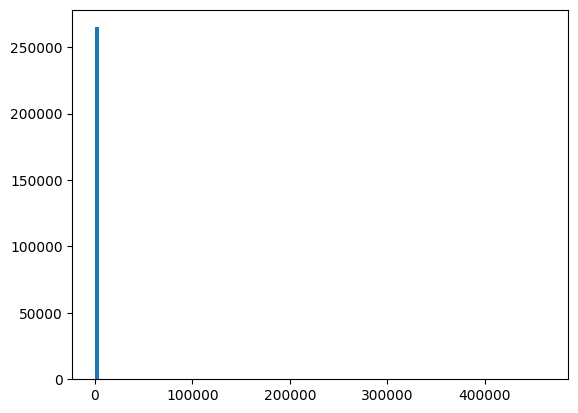

In [ ]:
import pickle
from collections import Counter
import itertools # Import itertools for flattening
import pandas as pd

with open('all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

# Flatten the list of lists using itertools.chain.from_iterable
all_tokens_flat = list(itertools.chain.from_iterable(all_tokens)) # New line to flatten the list

token_count = Counter(all_tokens_flat)  # Now pass the flattened list to Counter
token_freq = token_count.most_common()

gdf = pd.DataFrame(token_freq,columns=['token','count'])
gdf['count'].hist(grid=False,bins=100)

*used gemini here to help me flatten the data

Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?

Most tokens appear only once, and even the 75th percentile appears just twice, while the most common token shows up 1,365 times. Rare tokens aren't useful for predicting scams, and overly common ones like "the" or "and" aren’t either.








### Q3.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

I had an error here that I was not able to fix :(((

In [ ]:
df = pd.read_csv('/root/Phishing_Email.parquet')

y = df['Email Type']
X = df.drop('Email Type',axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=125)

lm_0 = LinearRegression(fit_intercept=False).fit(X_train,y_train)
y_hat_test_0 = lm_0.predict(X_test)
y_hat_train_0 = lm_0.predict(X_train)
print('train: ', r2_score(y_hat_train_0,y_train) )
print('test: ', r2_score(y_hat_test_0,y_test) )
rdf = pd.DataFrame({'variable':lm_0.feature_names_in_ , 'value':lm_0.coef_})
rdf['abs'] = np.abs(rdf['value'])
rdf.sort_values('abs',ascending=False)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

### Q4.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

In [ ]:
reduction = PCA(n_components=2).fit(X_train)
Z_train = reduction.transform(X_train)
Z_test = reduction.transform(X_test)
sns.scatterplot(x=Z_test[:,0],y=Z_test[:,1],hue=y_test)

ValueError: could not convert string to float: 'Kevin wrote:\n> am i the only one who thinks this is like "friday night 80\'s" for ilug?\n> and here\'s an answer from 1989.  for those perceptive folks in the\n> audience you\'ll note that it makes no reference to a windows icons.> so yeah, unrm would be nice, but obviously it\'s not a simple problem.\n> millions of lines of code, hundreds of projects, no unrm.  heck, the\n> hurd will probably release 1.0 before unrm shows up.So what this tells us is:\n1) There are very few new ideas.\n2) Problems exists until someone gets annoyed enough to actually fix them\nrather than find bizarre ways to solve the problem.\n3) I have too much creative time on my hands with not enough productive\ntime.>>From which we can infer that no work on unrm will be happening on my\ncomputer for a long time.:)- Matthew\n__________________________________________________\nDo You Yahoo!?\nEverything you\'ll ever need on one web page\nfrom News and Sport to Email and Music Charts\nhttp://uk.my.yahoo.comm\n-- \nIrish Linux Users\' Group: ilug@linux.ie\nhttp://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.\nList maintainer: listmaster@linux.ie\n'

### Q5.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [ ]:
reduction = PCA(n_components=2610).fit(X_train)
Z_train = reduction.transform(X_train)
Z_test = reduction.transform(X_test)

lm_k = LinearRegression().fit(Z_train,y_train)
y_hat_test = lm_k.predict(Z_test)
y_hat_train = lm_k.predict(Z_train)

print('Train r2: ', r2_score(y_hat_train,y_train) )
print('Test r2: ', r2_score(y_hat_test,y_test) )

ValueError: could not convert string to float: 'Kevin wrote:\n> am i the only one who thinks this is like "friday night 80\'s" for ilug?\n> and here\'s an answer from 1989.  for those perceptive folks in the\n> audience you\'ll note that it makes no reference to a windows icons.> so yeah, unrm would be nice, but obviously it\'s not a simple problem.\n> millions of lines of code, hundreds of projects, no unrm.  heck, the\n> hurd will probably release 1.0 before unrm shows up.So what this tells us is:\n1) There are very few new ideas.\n2) Problems exists until someone gets annoyed enough to actually fix them\nrather than find bizarre ways to solve the problem.\n3) I have too much creative time on my hands with not enough productive\ntime.>>From which we can infer that no work on unrm will be happening on my\ncomputer for a long time.:)- Matthew\n__________________________________________________\nDo You Yahoo!?\nEverything you\'ll ever need on one web page\nfrom News and Sport to Email and Music Charts\nhttp://uk.my.yahoo.comm\n-- \nIrish Linux Users\' Group: ilug@linux.ie\nhttp://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.\nList maintainer: listmaster@linux.ie\n'

### Q6.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

PCA makes features independent, avoiding multicollinearity. It's easier to pick the number of components than combinations, but components aren’t as interpretable as words.






